<a href="https://www.kaggle.com/code/rishabhanand16/notebookf08e86b5cd?scriptVersionId=193519754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa as lib
import librosa.display
import IPython.display as ipd
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans

In [2]:
data1, sr = lib.load("/kaggle/input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav", sr = 16000)
data1
ipd.Audio(data1, rate = sr )

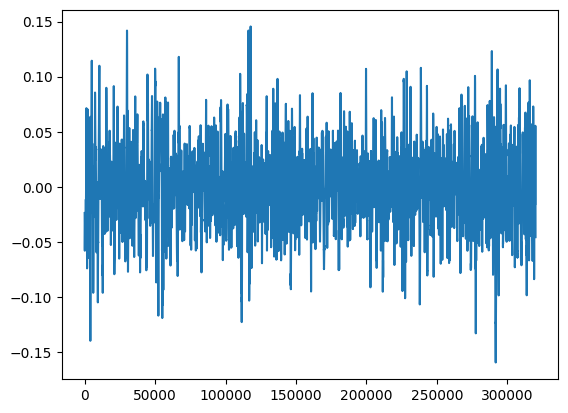

In [3]:
plt.plot(range(len(data1)),data1)

In [4]:
FRAME1 = 1024
HOP1 = 512

sound_stft = lib.stft(data1, n_fft=FRAME1, hop_length=HOP1)

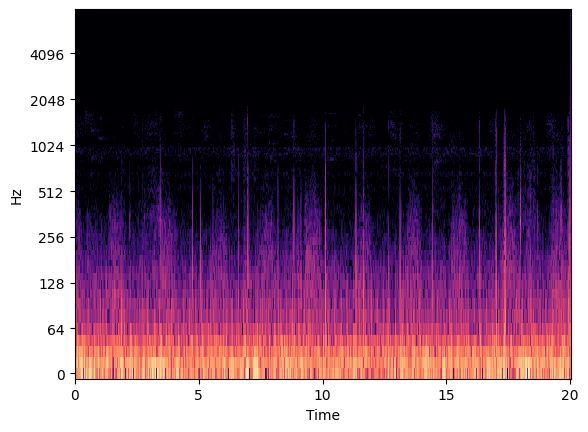

In [5]:
sound_stft_M = np.abs(sound_stft)
sound_stft_A = np.angle(sound_stft)

D = librosa.amplitude_to_db(sound_stft_M, ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=HOP1, x_axis = 'time')

In [6]:
epsilon = 1e-10
total_magnitude = sound_stft_M + epsilon

dims = np.shape(total_magnitude)
rows = dims[0]
cols = dims[1]

I = 8

In [7]:
W = np.abs(np.random.normal(loc=0,scale=2.5,size=(rows,I)))
H = np.abs(np.random.normal(loc=0,scale=2.5,size=(I,cols)))

In [8]:
MAXITER = 5000

for i in range(MAXITER):
    H *= W.T@(total_magnitude/(W@H))/(W.T@np.ones(dims))
    W *= (total_magnitude/(W@H))@H.T/(np.ones(dims)@H.T)

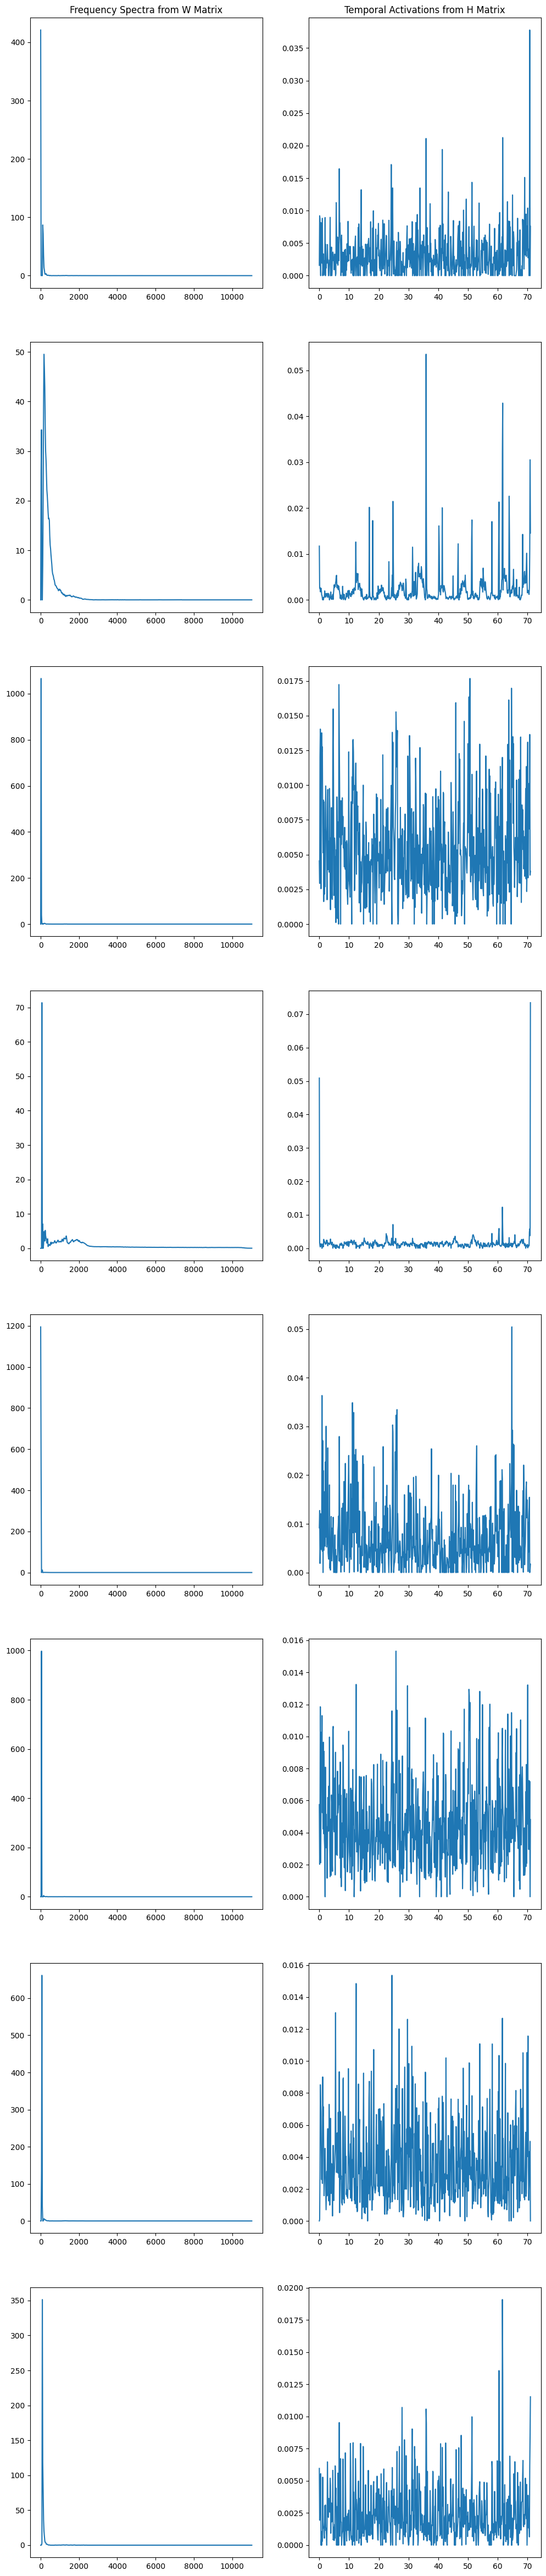

In [9]:
f, axs = plt.subplots(I,2,figsize=(12,60))
axs[0,0].set_title('Frequency Spectra from W Matrix')
axs[0,1].set_title('Temporal Activations from H Matrix')
for row in range(I):
    axs[row,0].plot(np.linspace(0,11025,rows),W[:,row])
    axs[row,1].plot(np.linspace(0,71,cols),H[row])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


H_heart shape: (8, 157)
H_lung shape: (8, 469)


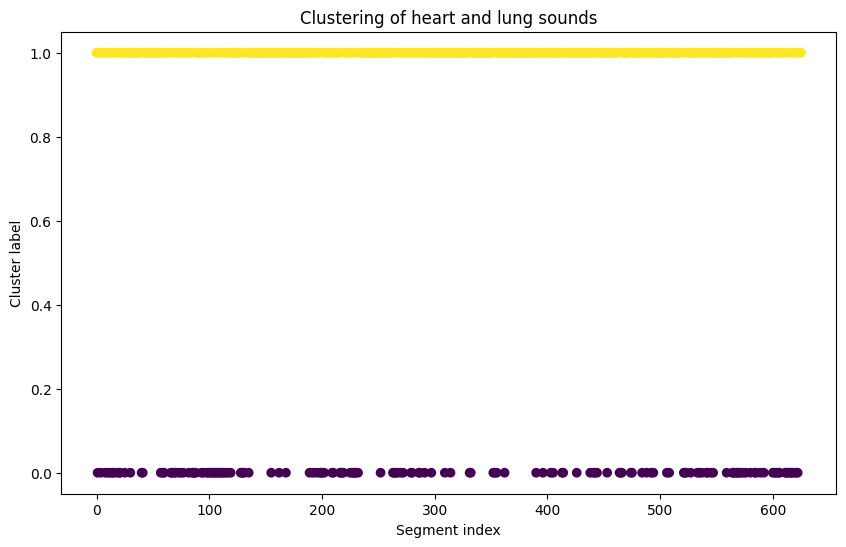

In [10]:
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(H.T)
labels1 = kmeans1.labels_

heart_mask = labels1 == 0
lung_mask = labels1 == 1

H_heart = H[: , heart_mask]
H_lung = H[: , lung_mask]


print("H_heart shape:", H_heart.shape)
print("H_lung shape:", H_lung.shape)

plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(labels1)), labels1, c=labels1, cmap='viridis')
plt.xlabel('Segment index')
plt.ylabel('Cluster label')
plt.title('Clustering of heart and lung sounds')
plt.show()



In [11]:
W.shape

(513, 8)